<a href="https://colab.research.google.com/github/srinijamadireddy19/machine-learning-practice/blob/main/dimentionality_reduction_comparision_with_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [3]:
X = mnist.data
y = mnist.target

In [4]:
X_train, X_test = X[:60000], X[60000:]

In [5]:
y_train, y_test = y[:60000], y[60000:]

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time

In [7]:
rf_clf = RandomForestClassifier(random_state=45,n_estimators=100)

In [8]:
start_time = time.time()

In [9]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [10]:
end_time = time.time()
train_duration = end_time - start_time
train_duration

55.57824444770813

In [11]:
y_pred = rf_clf.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.9695

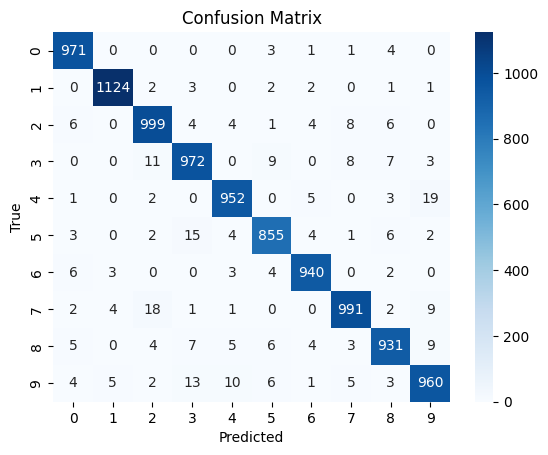

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=0.95)

In [20]:
X_train_pca = pca.fit_transform(X_train)

In [21]:
X_test_pca = pca.transform(X_test)

In [22]:
rf_clf_pca = RandomForestClassifier(random_state=45,n_estimators=100)

In [23]:
rf_clf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(random_state=45)

In [24]:
y_pred_pca = rf_clf_pca.predict(X_test_pca)

In [25]:
accuracy_score(y_test, y_pred_pca)

0.9475

In [26]:
from sklearn.linear_model import SGDClassifier

In [27]:
sgd_clf = SGDClassifier(random_state=45)

In [28]:
start_time = time.time()

In [29]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=45)

In [30]:
end_time = time.time()
train_time_sgd = end_time - start_time
train_time_sgd

229.79858136177063

In [31]:
y_pred_sgd = sgd_clf.predict(X_test)

In [32]:
accuracy_score(y_test, y_pred_sgd)


0.8593

In [33]:
sgd_clf_pca = SGDClassifier(random_state=45)

In [34]:
start_time = time.time()

In [35]:
sgd_clf_pca.fit(X_train_pca, y_train)

SGDClassifier(random_state=45)

In [36]:
end_time = time.time()
train_time_sgd_pca = end_time - start_time
train_time_sgd_pca

47.226507902145386

In [37]:
y_pred_sgd_pca = sgd_clf_pca.predict(X_test_pca)

In [40]:
accuracy_score(y_test, y_pred_sgd_pca)


0.8964